In [1]:
from sklearn.manifold import TSNE
import time
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('model/lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
df = pd.DataFrame(list_topic)
print(df.info()) 
topic_assignments = [topic.index(max(topic)) for topic in list_topic]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6531 non-null   float64
 1   1       6531 non-null   float64
 2   2       6531 non-null   float64
 3   3       6531 non-null   float64
 4   4       6531 non-null   float64
 5   5       6531 non-null   float64
dtypes: float64(6)
memory usage: 306.3 KB
None


In [3]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df)
tsne.kl_divergence_

c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


1.0033037662506104

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


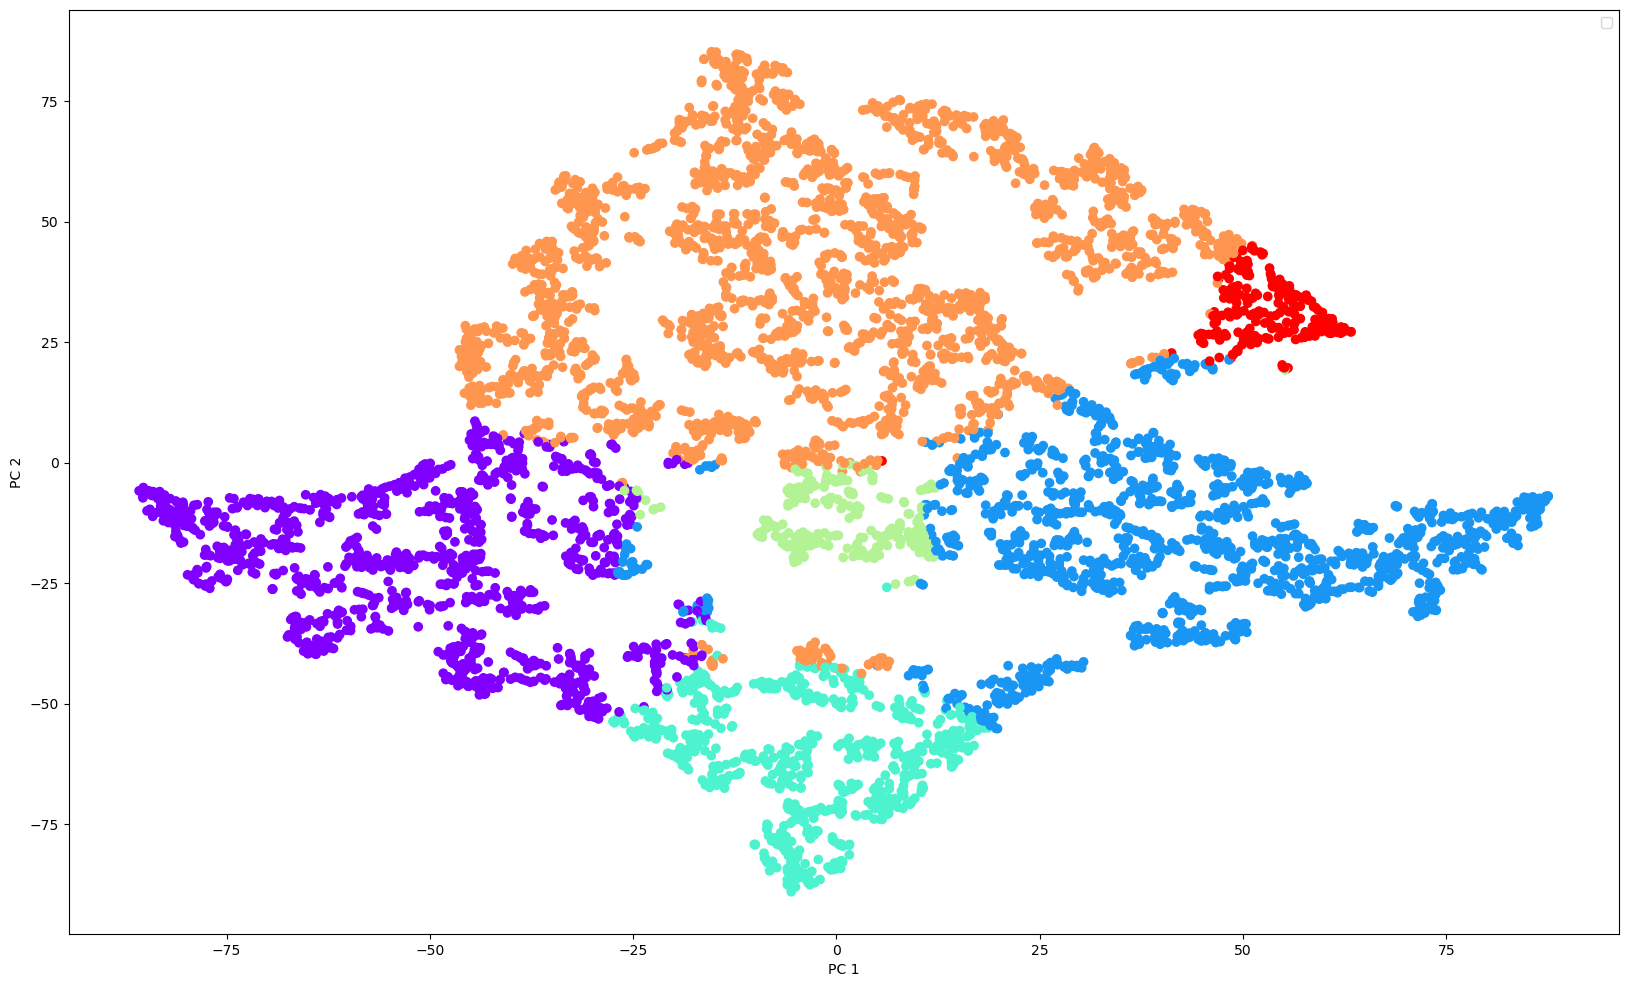

In [4]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.legend()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=topic_assignments, cmap='rainbow')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [10]:
perplexity = np.arange(5, 55, 5)
divergence = []
import plotly.express as px

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(df)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()
print(min(divergence))

c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 

0.9228756427764893


c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


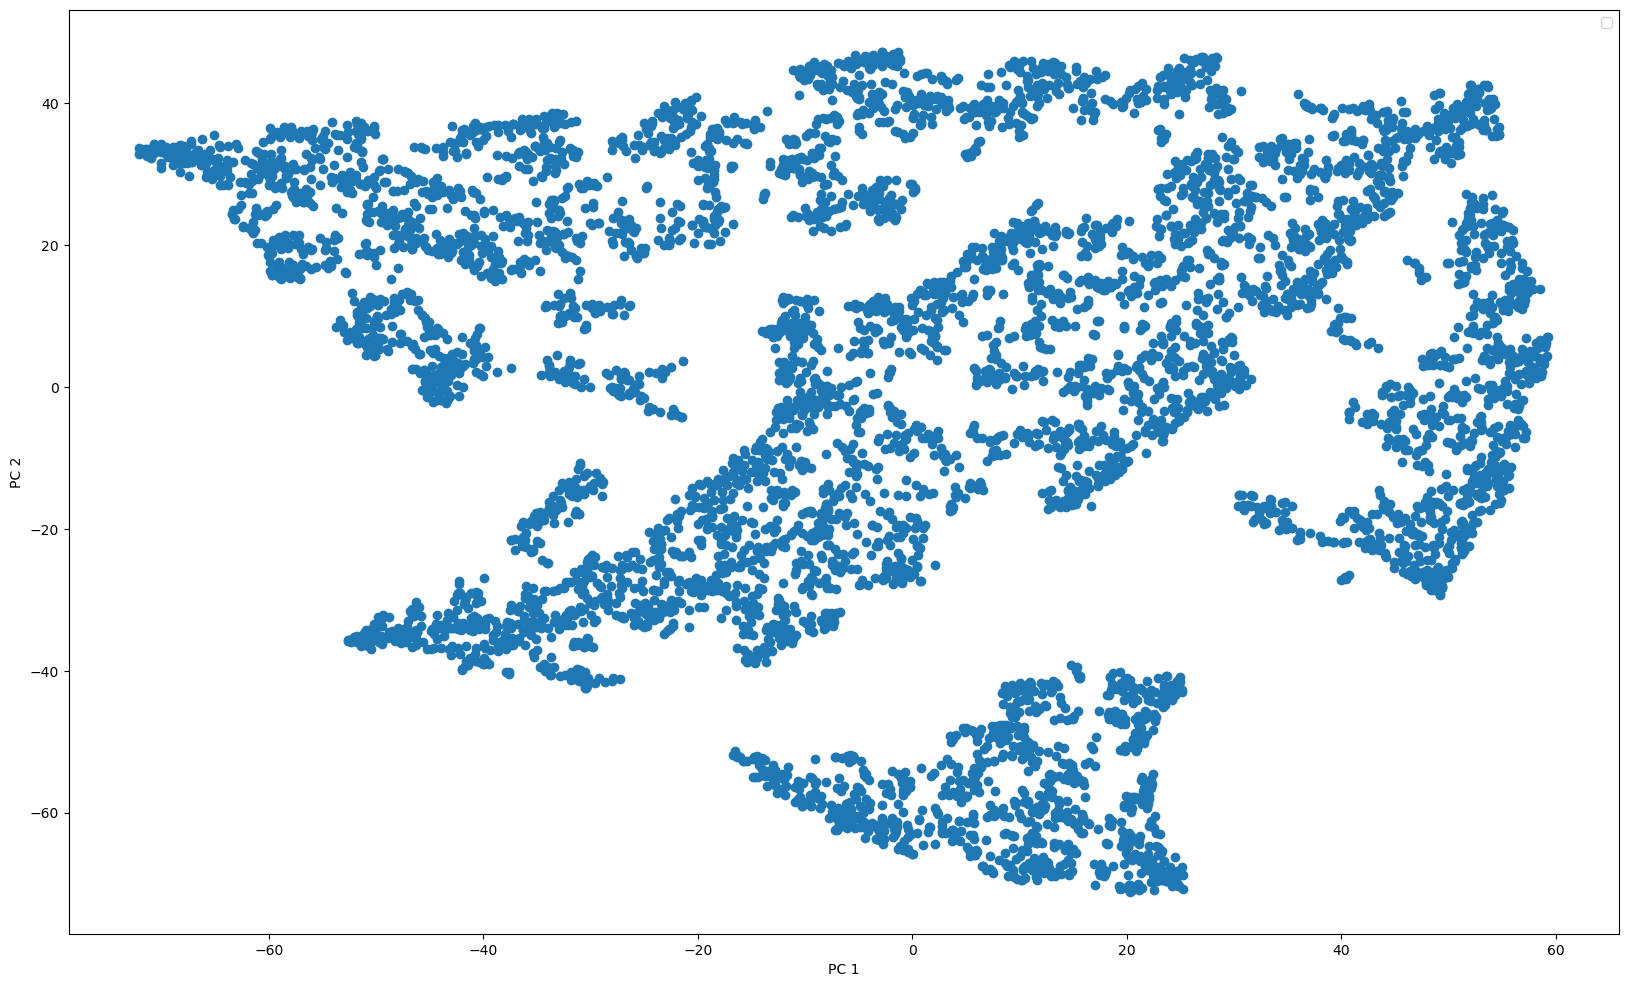

In [12]:
tsne = TSNE(n_components=2,perplexity=50)
X_train_tsne = tsne.fit_transform(df)

fig, ax = plt.subplots(figsize=(20, 12))
ax.legend()
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()